Lattice,rm=0.05,D=0.1,con=4.990135427399938
Lattice,rm=0.05,D=0.02,con=4.848828080559129
Lattice,rm=0.05,D=0.01,con=4.585748500941207
egfrd,rm=0.05,D=0.1,con=4.950238000000002
egfrd,rm=0.05,D=0.02,con=4.8023
egfrd,rm=0.05,D=0.01,con=4.526736000000001
rdme,rm=1.0,D=0.1,con=5.020990711861533
rdme,rm=1.0,D=0.01,con=5.149795665147106
rdme,rm=1.0,D=0.02,con=5.071642709175896


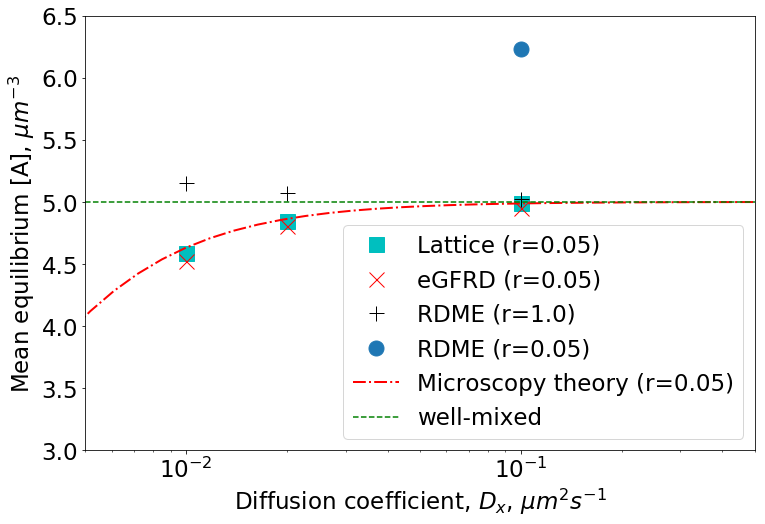

In [1]:
from math import pi as pi
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from ecell4 import *

fac=1.0208582
ms=15
lw=2
fs=23
fig,ax1=plt.subplots(1,1,figsize=(12,8))

def getconcb(rm,D,L,sim):
    V=L**3
    if (sim=='spa'):    
        V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),fac*rm)  
        d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}b'.format(sim,rm,D,L),delimiter=',')    
    else:
        d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_{}_rm{}_D{}_L{}'.format(sim,rm,D,L),delimiter=',')    
    return np.mean(d[:,1][90:])/V

def mtheory(rm,Ds,m):
    def cal(rm,D):
        R=rm*2
        Ca=5
        Cb=1  #[B]
        k0=0.1  #production rate
        keff = k0/Ca/Cb #degradation rate     
        kd=4*pi*R*D*2    
        ka=keff*kd/(kd-keff)
        kon=kd*ka/(kd+ka)
        t2=(4*pi*Cb*(ka*R/(ka+kd))**3)**0.5
        return 0.1/kon/(1+t2)    
    conas = [cal(rm,D) for D in Ds]
    plt.plot(Ds,conas,m,label='Microscopy theory (r={:.3})'.format(rm),linewidth=lw)

meane = [[4.9502380000000024, 0.05, 0.1],[4.8023, 0.05, 0.02],[4.5267360000000014,0.05,0.01] ]
meanspab=[[0.05,0.1,4.64],[0.05,0.02,4.64],[0.05,0.01,4.64]]
meanmeso=[[1.,0.1,4.64],[1.,0.01,4.64],[1.,0.02,4.64]]

cons=[]
for rm,D,L in meanspab:
    con=getconcb(rm,D,L,'spa')
    cons.append(con)
    print('Lattice,rm={},D={},con={}'.format(rm,D,con))
ax1.plot(np.asarray(meanspab)[:,1],cons,'cs',markersize=ms,label='Lattice (r={})'.format(rm)) 

for con,rm,D in meane:
    print('egfrd,rm={},D={},con={}'.format(rm,D,con))
ax1.plot(np.asarray(meane)[:,2],np.asarray(meane)[:,0],'rx',markersize=ms,label='eGFRD (r={})'.format(rm)) 

conm=[]
for rm,D,L in meanmeso:
    con=getconcb(rm,D,L,'meso')
    conm.append(con)
    print('rdme,rm={},D={},con={}'.format(rm,D,con))   
ax1.plot(np.asarray(meanmeso)[:,1],conm,'k+',markersize=ms,label='RDME (r={})'.format(rm))      

con=getconcb(0.05,0.1,4.64,'meso')
ax1.plot(0.1,con,'o',markersize=ms,label='RDME (r={})'.format(0.05))      
    
mtheory(0.05,np.logspace(-2.5,1,50),'r-.')
ax1.plot(np.linspace(0.005,0.5,100),[5]*100,'g--',label='well-mixed')
ax1.set_xscale('log')
ax1.set_xlabel('Diffusion coefficient, $D_x$, $\mu m^{2} s^{-1}$',fontsize=fs)
ax1.set_ylabel('Mean equilibrium [A], $\mu m^{-3}$',fontsize=fs)
ax1.tick_params(labelsize=fs)
ax1.set_ylim(3,6.5)
ax1.set_xlim(0.005,0.5)
ax1.legend(loc=4,fontsize=fs)
plt.savefig('/home/chew/ecellwork/figure/fig5b.eps',format='eps',dpi=900)

In [30]:
np.asarray(meane)[:,0]

array([ 4.950238,  4.8023  ,  4.526736])

In [5]:
import matplotlib
matplotlib.__version__

'2.1.1'